# Do I want this mirror?

Calculating mirror reflectivity curves for a Si substrate and various coatings and energies

## Imports

In [8]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import xrt.backends.raycing.materials as rm
from xrt.backends.raycing.materials_elemental import Si, Pt, Rh, W, Cu, Ni, Cr, Ti, Zr, Be, In, Ir
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'svg'
# pio.renderers.default = 'iframe'

# working energies
ens = [8000, 15000, 17000]  # eV
# maximum length of a reasonably priced mirror
mlen = 300  # mm

## Mirror reflectivity
Here we compare a Si mirror with a Si + 100 AA Ir coating reflectivity.
On the plots x axis is beam height, which is length of the mirror `mlen` multiplied by sine of the incidence angle, giving the maximum cross-section of the reflected beam.

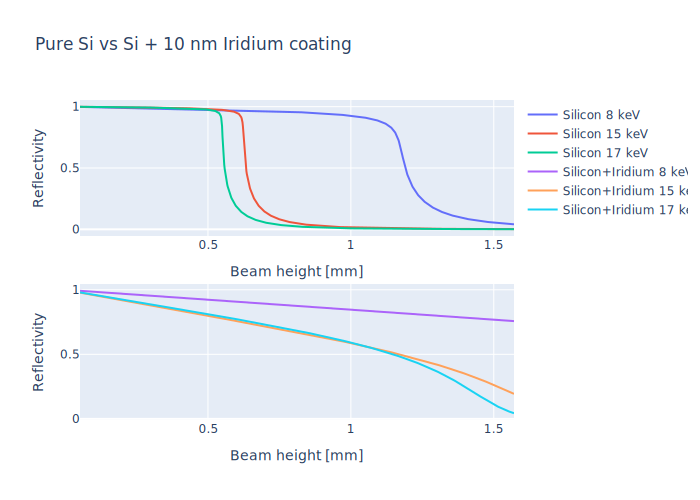

In [9]:
substrate = Si(kind="mirror")
coating = Ir(kind="mirror")
coating_th = 100
cMirror = rm.Coated(
    coating=coating,
    cThickness=coating_th,
    substrate=substrate,
    surfaceRoughness=30,
    substRoughness=30,
)

theta = np.linspace(np.radians(0.01), np.radians(0.3), 1000)
beam_height = mlen * np.sin(theta)

fig = make_subplots(rows=2, cols=1)
for en in ens:
    rs, rp = substrate.get_amplitude(en, np.sin(theta))[0:2]
    fig.add_trace(go.Line(name=f"{substrate.name} {en//1000} keV", x=beam_height, y=np.abs(rs)**2))
fig.update_layout(
    title=dict(text=f"Pure Si vs Si + {coating_th // 10} nm {coating.name} coating"),
)
for en in ens:
    rs, rp = cMirror.get_amplitude(en, np.sin(theta))[0:2]
    fig.add_trace(go.Line(name=f"{substrate.name}+{coating.name} {en//1000} keV", x=beam_height, y=np.abs(rs)**2), row=2,col=1)
fig.update_yaxes(title_text="Reflectivity", row=1, col=1)
fig.update_yaxes(title_text="Reflectivity", row=2, col=1)
fig.update_xaxes(title_text="Beam height [mm]", row=1, col=1)
fig.update_xaxes(title_text="Beam height [mm]", row=2, col=1)
fig.show()